In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()

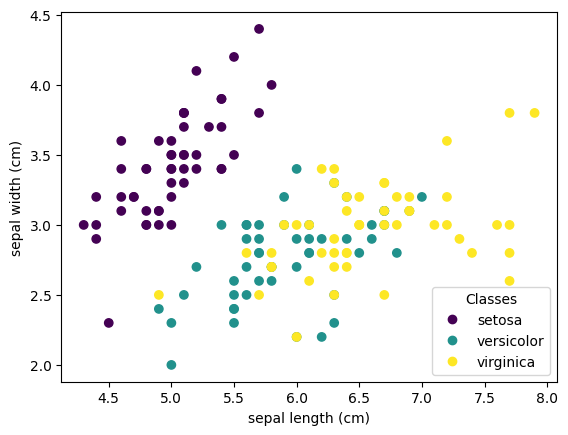

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
# reclassify into 2 categories
X = iris.data
y = iris.target

# Keep only first two classes for binary classification
X = X[y != 2]
# I found that using only 2 features also outperformed when using keras and thus only used the same 2 features I used in the numpy version.
# can comment out the line below if all 4 features are needed
X = X[:, :2]

y = y[y != 2]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
sgd_model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
learning_rate = .5
sgd_model.compile(optimizer=SGD(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 200
history = sgd_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0)

In [ ]:
# Evaluate the model
test_loss, test_accuracy = sgd_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 33ms/step - loss: 0.0031 - accuracy: 1.0000
Test Loss: 0.0030683944933116436
Test Accuracy: 1.0


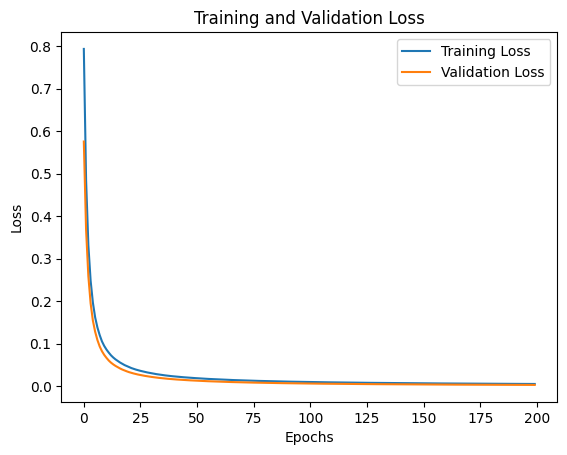

In [ ]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

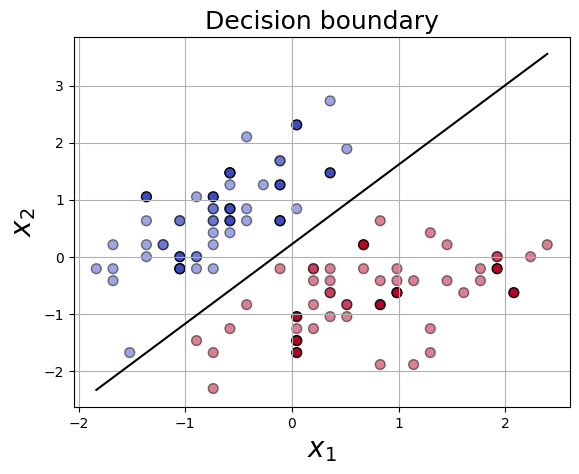

In [ ]:
import matplotlib.pyplot as plt

# Define the plot_decision_boundary function
def plot_decision_boundary(X_train, y_train, X_test, y_test, w, b):
    plt.grid()
    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title('Decision boundary', size=18)

    xs = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
    ys = -(w[0] * xs + b) / w[1]  # Calculate the decision boundary line

    # Plot the decision boundary line
    plt.plot(xs, ys, c='black')

    # Plot the train data points with light colors
    plt.scatter(X_train[:, 0], X_train[:, 1], s=50, c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.5)

    # Plot the test data points with regular colors
    plt.scatter(X_test[:, 0], X_test[:, 1], s=50, c=y_test, cmap='coolwarm', edgecolors='k')

# Assuming you have defined colormap and imported necessary libraries

plot_decision_boundary(X_train, y_train, X_test, y_test, sgd_model.layers[0].get_weights()[0].flatten(), sgd_model.layers[0].get_weights()[1])
plt.show()